# Striatal dopamine dynamics - Fig. 3, Sensitivity of the model to parameter changes

Written by Aske Lykke Ejdrup<br>
Last updated: 2023/08/21

Code for the model presented in the manuscript:<br>
**Striatal dopamine dynamics and the regulation by the dopamine transporter** (unpublished)<br>
<font size = "2">By Aske L. Ejdrup<sup>1</sup>, Jakob K. Dreyer<sup>2</sup>, Matthew D. Lycas<sup>1</sup>, Søren H. Jørgensen<sup>1</sup>, Trevor W. Robbins<sup>3,4</sup>, Jeffrey W. Dalley<sup>3,4,5</sup>, Freja Herborg<sup>1</sup> and Ulrik Gether<sup>1</sup></font>

<br>


<font size = "2">
<sup>1</sup>Department of Neuroscience, Faculty of Health and Medical Sciences, Maersk Tower 7.5,
University of Copenhagen, Copenhagen, Denmark<br>
<sup>2</sup>Department of Bioinformatics, H Lundbeck A/S, Valby, Denmark<br>
<sup>3</sup>Behavioural and Clinical Neuroscience Institute, University of Cambridge, Cambridge CB2 3EB, UK<br>
<sup>4</sup>Department of Psychology, University of Cambridge, Cambridge CB2 3EB, UK<br>
<sup>5</sup>Department of Psychiatry, University of Cambridge, Cambridge CB2 0SZ, UK<br>
</font>

<font color="grey">Size of simulation space is defined as an input parameter in *sim.sim_space_neurons_3D*. If the code takes too long to run, consider reducing the size.</font>

#### Import functions

In [1]:
import sim_functions as sim
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
from tqdm import tqdm
from matplotlib.gridspec import GridSpec

### Figure 3E and F, effect of Q on DA levels

#### Simulate the dynamics across Q ranges

In [3]:
# Preallocate space and set Q range
Q_range = np.linspace(1000,30000,30)
Q_percentiles_DS = np.zeros((4,len(Q_range)))
Q_percentiles_VS = np.zeros((4,len(Q_range)))
mean_DS = np.zeros((len(Q_range),))
mean_VS = np.zeros((len(Q_range),))

## DS
simulation, space_init, firing, release_sites, var_list = \
    sim.sim_space_neurons_3D(width = 50, depth = 50, dx_dy = 1, time = 2, D = 763,
                  inter_var_distance = 25, p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = 0.01)

print("Simulating DS")
for i, Q_val in enumerate(Q_range):
    full_sim, _, _ = sim.sim_dynamics_3D(simulation, space_init, release_sites, firing, var_list, 
                     Q = Q_val, uptake_rate = 6*10**-6, Km = 210*10**-9, Ds = 321.7237308146399)
    
    Q_percentiles_DS[:,i] = np.percentile(full_sim[int(full_sim.shape[0]/4):,:,:,:],[10,50,99.5,90])
    mean_DS[i] = np.mean(full_sim[int(full_sim.shape[0]/4):,:,:,:])
    

## VS
simulation, space_init, firing, release_sites, var_list = \
    sim.sim_space_neurons_3D(width = 50, depth = 50, dx_dy = 1, time = 2, D = 763,
              inter_var_distance = 25*(1/0.9), p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = 0.01)

print("Simulating VS")
for i, Q_val in enumerate(Q_range):
    full_sim, _, _ = sim.sim_dynamics_3D(simulation, space_init, release_sites, firing, var_list, 
                     Q = Q_val, uptake_rate = 2*10**-6, Km = 210*10**-9, Ds = 321.7237308146399)
    
    Q_percentiles_VS[:,i] = np.percentile(full_sim[int(full_sim.shape[0]/4):,:,:,:],[10,50,99.5,90])
    mean_VS[i] = np.mean(full_sim[int(full_sim.shape[0]/4):,:,:,:])

100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 672.47it/s]


#### Plot the results on [DA]

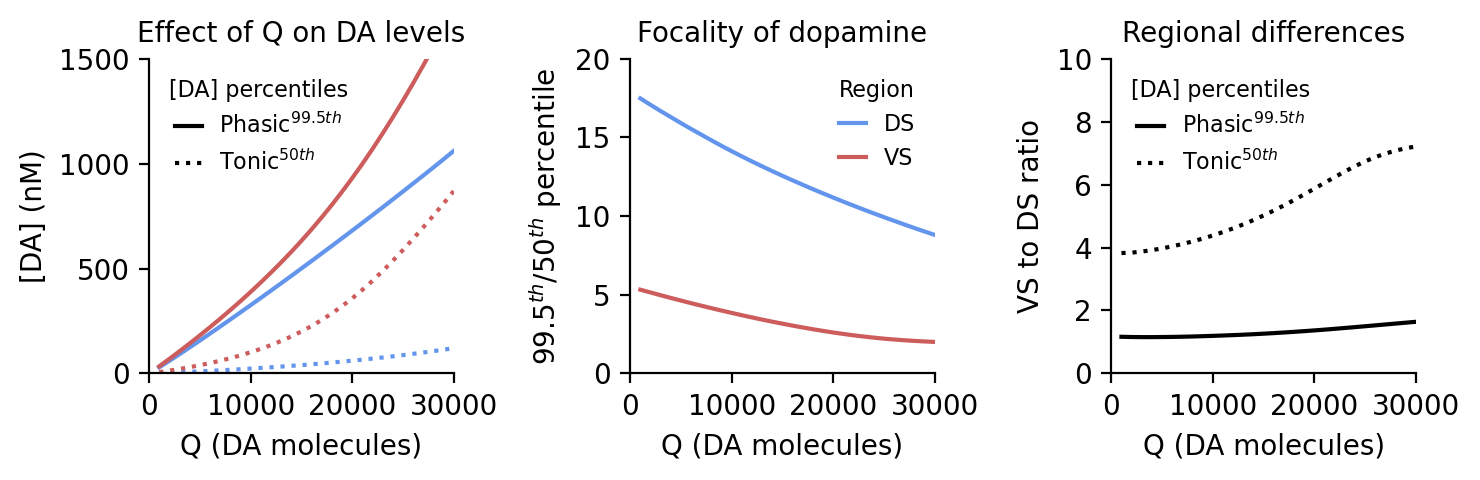

In [5]:
fig, (ax1, ax3, ax2) = plt.subplots(1,3,figsize = (7.5,2.5), dpi = 200)
ax1.set_title("Effect of Q on DA levels", fontsize = 10)
ax1.set_ylabel("[DA] (nM)")
ax1.set_xlabel("Q (DA molecules)")
ax1.set_ylim(0,1500)
ax1.set_xlim(0,30000)
color_list = ["black","grey","lightgrey"][::-1]

# "Fake" legends
ax1.plot([],[], color = "k", ls = "-")
# ax1.plot([],[], color = "k", ls = "-.")
ax1.plot([],[], color = "k", ls = ":")
legend = ax1.legend(("Phasic$^{99.5th}$","Tonic$^{50th}$"), frameon = False,
            handlelength = 1.2, prop={'size': 8}, loc = "upper left")
            # handlelength = 1.2, prop={'size': 9}, bbox_to_anchor=[0.38, 1.02], loc = "upper right")
legend.set_title('[DA] percentiles',prop={'size': 8})

# Conventional Km indicator
# ax1.vlines(210*10**-9,0,300, color = "dimgrey", lw = 0.8, ls = "-")
# ax1.text(350*10**-9, 300, "Conventional K$_\mathrm{m}$",rotation = 90, ha = "left", va = "top", color = "dimgrey")

linestyles = [":","-","-"]
# DS and VS lines
for i in range(2):
    ax1.plot(Q_range,Q_percentiles_DS[i+1,:]*10**9, color = "cornflowerblue", ls = linestyles[i])
    if i == 10:
        ax1.plot(Q_range+80,Q_percentiles_VS[i+1,:]*10**9, color = "indianred", ls = linestyles[i])
    else:
        ax1.plot(Q_range,Q_percentiles_VS[i+1,:]*10**9, color = "indianred", ls = linestyles[i])

    
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)


# Relative difference
ax2.set_xlabel("Q (DA molecules)")
ax2.set_title("Regional differences", fontsize = 10)
ax2.set_ylabel("VS to DS ratio")
ax2.set_ylim(0,10)
ax2.set_xlim(0,30000)

linestyles = [":",":","-"]

# DS and VS relative line
ax2.plot(Q_range[:],(Q_percentiles_VS[2,:]/Q_percentiles_DS[2,:]), color = "k", ls = linestyles[2])
ax2.plot(Q_range[:],(Q_percentiles_VS[1,:]/Q_percentiles_DS[1,:]), color = "k", ls = linestyles[1])

legend = ax2.legend(("Phasic$^{99.5th}$","Tonic$^{50th}$"), frameon = False,
            handlelength = 1.2, prop={'size': 8}, loc = "upper left", ncol = 1, columnspacing = 0.7, bbox_to_anchor = [0,1])
legend.set_title('[DA] percentiles',prop={'size': 8})

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)


# Relative difference
ax3.set_xlabel("Q (DA molecules)")
ax3.set_title("Focality of dopamine", fontsize = 10)
ax3.set_ylabel("99.5$^{th}$/50$^{th}$ percentile")
ax3.set_ylim(0,20)
ax3.set_xlim(0,30000)
ax3.plot(Q_range[:],Q_percentiles_DS[2,:]/Q_percentiles_DS[1,:], color = "cornflowerblue")
ax3.plot(Q_range[:],Q_percentiles_VS[2,:]/Q_percentiles_VS[1,:], color = "indianred")

legend = ax3.legend(("DS", "VS"), frameon = False,
            handlelength = 1.2, prop={'size': 8}, loc = "upper right")
            # handlelength = 1.2, prop={'size': 9}, bbox_to_anchor=[0.38, 1.02], loc = "upper right")
legend.set_title('Region',prop={'size': 8})


ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

fig.tight_layout()

### Figure 3K and L, effect of V<sub>max</sub> on DA levels

#### Simulate the dynamics across a V<sub>max</sub> range

In [8]:
# Set Vmax range and preallocate space
vmax_range = np.linspace(0.5*10**-6,10*10**-6,39)
vmax_percentiles_DS = np.zeros((3,len(vmax_range)))
vmax_percentiles_VS = np.zeros((3,len(vmax_range)))


# Simulate release sites and firing pattern for DS and VS
simulation_DS, space_init_DS, firing_DS, release_sites_DS, var_list_DS = \
        sim.sim_space_neurons_3D(width = 50, depth = 50, dx_dy = 1, time = 2, D = 763,
                  inter_var_distance = 25, p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = 0.01)
        
simulation_VS, space_init_VS, firing_VS, release_sites_VS, var_list_VS = \
        sim.sim_space_neurons_3D(width = 50, depth = 50, dx_dy = 1, time = 2, D = 763,
                  inter_var_distance = 25*(1/0.9), p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = 0.01)

# Simulate the dynamics
for i, vmax_val in enumerate(vmax_range):
    print(i)
    
    ## DS
    full_sim, _, _ = sim.sim_dynamics_3D(simulation_DS, space_init_DS, release_sites_DS, firing_DS, var_list_DS, 
                     Q = 3000, uptake_rate = vmax_val, Km = 210*10**-9, Ds = 321.7237308146399)
    
    vmax_percentiles_DS[:,i] = np.percentile(full_sim[int(full_sim.shape[0]/2):,:,:,:],[10,50,99.5])
    
    
    ## VS
    full_sim, _, _ = sim.sim_dynamics_3D(simulation_VS, space_init_VS, release_sites_VS, firing_VS, var_list_VS, 
                     Q = 3000, uptake_rate = vmax_val, Km = 210*10**-9, Ds = 321.7237308146399)
    
    vmax_percentiles_VS[:,i] = np.percentile(full_sim[int(full_sim.shape[0]/2):,:,:,:],[10,50,99.5])

0


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 657.49it/s]


1


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 670.32it/s]


2


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 672.28it/s]


3


100%|██████████████████████████████████████| 6103/6103 [00:08<00:00, 679.06it/s]


4


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 660.15it/s]


5


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 661.60it/s]


6


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 668.66it/s]


7


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 665.76it/s]


8


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 662.97it/s]


9


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 656.40it/s]


10


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 658.00it/s]


11


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 669.04it/s]


12


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 662.61it/s]


13


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 665.02it/s]


14


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 660.57it/s]


15


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 663.09it/s]


16


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 661.60it/s]


17


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 674.15it/s]


18


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 671.73it/s]


19


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 674.11it/s]


20


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 671.66it/s]


21


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 672.10it/s]


22


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 674.26it/s]


23


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 665.39it/s]


24


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 663.74it/s]


25


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 663.16it/s]


26


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 665.58it/s]


27


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 660.31it/s]


28


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 670.47it/s]


29


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 666.10it/s]


30


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 668.74it/s]


31


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 658.76it/s]


32


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 673.43it/s]


33


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 670.44it/s]


34


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 671.52it/s]


35


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 672.41it/s]


36


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 673.95it/s]


37


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 673.67it/s]


38


100%|██████████████████████████████████████| 6103/6103 [00:09<00:00, 674.13it/s]


#### Plot absolute effect on [DA] (Figure 3K)

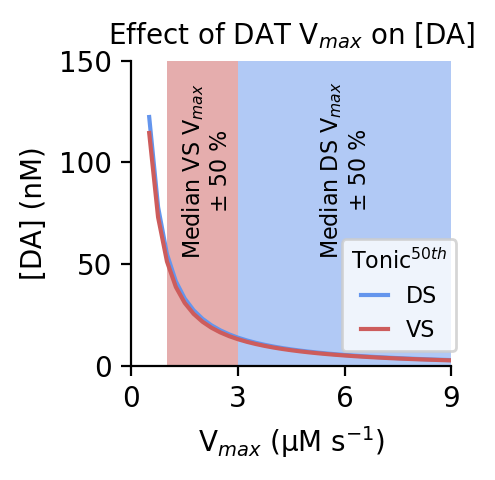

In [13]:
fig, (ax1) = plt.subplots(1,1,figsize = (2.5,2.5), dpi = 200, gridspec_kw={"width_ratios": [1]})

ax1.set_title("Effect of DAT V$_{max}$ on [DA]", fontsize = 10)
ax1.set_ylabel("[DA] (nM)")
ax1.set_xlabel("V$_{max}$ (\u00B5M s$^{-1}$)")
ax1.set_ylim(0,150)
ax1.set_xlim(0*10**-6,9*10**-6)
ax1.set_xticks([0*10**-6,3*10**-6,6*10**-6,9*10**-6])
ax1.set_xticklabels([0,3,6,9])
color_list = ["black","grey","lightgrey"][::-1]

DS_max_idx = np.argmin(abs(vmax_range-(6*1.5)*10**-6))
DS_min_idx = np.argmin(abs(vmax_range-(6*0.5)*10**-6))

VS_max_idx = np.argmin(abs(vmax_range-(2*1.5)*10**-6))
VS_min_idx = np.argmin(abs(vmax_range-(2*0.5)*10**-6))

linestyles = [":","--","-"]

ax1.plot(vmax_range,vmax_percentiles_DS[1,:]*10**9, color = "cornflowerblue")
ax1.plot(vmax_range,vmax_percentiles_VS[1,:]*10**9, color = "indianred")

legend = ax1.legend(("DS", "VS"), frameon = True,
            handlelength = 1.2, prop={'size': 8}, loc = "upper right", bbox_to_anchor = [1.05,0.45])
legend.set_title('Tonic$^{50th}$',prop={'size': 8})

ax1.text(6*10**-6,55,
          "Median DS V$_{max}$\n\u00B1 50 %", ha = "center", fontsize = 8, rotation = 90)
ax1.fill_between(x = [3*10**-6,9*10**-6], y1 = [150,150], 
                  color = "cornflowerblue", alpha = 0.5, lw = 0)
ax1.text(2.1*10**-6,55,
          "Median VS V$_{max}$\n\u00B1 50 %", ha = "center", fontsize = 8, rotation = 90)
ax1.fill_between(x = [1*10**-6,3*10**-6], y1 = [150,150], 
                  color = "indianred", alpha = 0.5, lw = 0)

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)


fig.tight_layout()

#### Plot relative effect on [DA] (Figure 3L)

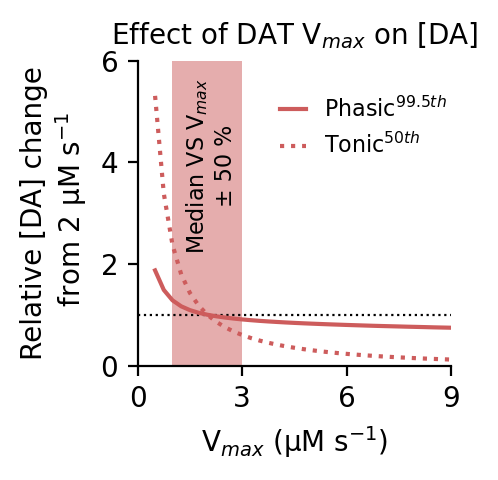

In [15]:
fig, (ax1) = plt.subplots(1,1,figsize = (2.5,2.5), dpi = 200, gridspec_kw={"width_ratios": [1]})

ax1.set_title("Effect of DAT V$_{max}$ on [DA]", fontsize = 10)
ax1.set_ylabel("Relative [DA] change\n from 2 \u00B5M s$^{-1}$")
ax1.set_xlabel("V$_{max}$ (\u00B5M s$^{-1}$)")
ax1.set_ylim(0,6)
ax1.set_xlim(0*10**-6,9*10**-6)
ax1.set_xticks([0*10**-6,3*10**-6,6*10**-6,9*10**-6])
ax1.set_xticklabels([0,3,6,9])
color_list = ["black","grey","lightgrey"][::-1]

DS_max_idx = np.argmin(abs(vmax_range-(6*1.5)*10**-6))
DS_min_idx = np.argmin(abs(vmax_range-(6*0.5)*10**-6))

VS_max_idx = np.argmin(abs(vmax_range-(2*1.5)*10**-6))
VS_min_idx = np.argmin(abs(vmax_range-(2*0.5)*10**-6))

linestyles = [":","--","-"]

ax1.plot(vmax_range,vmax_percentiles_VS[2,:]/vmax_percentiles_VS[2,6], color = "indianred", ls = "-")
ax1.plot(vmax_range,vmax_percentiles_VS[1,:]/vmax_percentiles_VS[1,6], color = "indianred", ls = ":")

ax1.hlines(1,0,9*10**-6, color = "k", lw = 0.8, ls = ":")

legend = ax1.legend(("Phasic$^{99.5th}$", "Tonic$^{50th}$"), frameon = False,
            handlelength = 1.2, prop={'size': 8}, loc = "upper right", bbox_to_anchor = [1.05,0.95])

ax1.text(2.1*10**-6,2.3,
          "Median VS V$_{max}$\n\u00B1 50 %", ha = "center", fontsize = 8, rotation = 90)
ax1.fill_between(x = [1*10**-6,3*10**-6], y1 = [150,150], 
                  color = "indianred", alpha = 0.5, lw = 0)

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)


fig.tight_layout()